In [6]:
import pandas as pd
import numpy as np
from collections import Counter

# ==================================================
# Load dataset (FIX: skip both header rows)
# ==================================================
df_header = pd.read_csv("synthetic_dna_dataset.csv", skiprows=1, header=None, nrows=2)
actual_columns = df_header.iloc[0].tolist()
df = pd.read_csv("synthetic_dna_dataset.csv", skiprows=[0, 1], header=None, names=actual_columns)

print("Columns:", df.columns.tolist())

# ==================================================
# K-mer functions
# ==================================================
def kmers(seq, k):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

def topN_mass(seq, k=3, top_n=10):
    ks = kmers(seq, k)
    c = Counter(ks)
    top_sum = sum(cnt for _, cnt in c.most_common(top_n))
    return top_sum / len(ks)

def max_kmer_freq(seq, k=3):
    ks = kmers(seq, k)
    c = Counter(ks)
    return max(c.values()) / len(ks)

def kmer_entropy(seq, k=3):
    ks = kmers(seq, k)
    c = Counter(ks)
    p = np.array(list(c.values()), dtype=float) / len(ks)
    return float(-(p * np.log2(p)).sum())

# ==================================================
# Test k-mer calculations
# ==================================================
seqs = df["Sequence"].astype(str).str.upper()
y = df["kmer_3_freq"].values

# Evaluate a few candidates
candidates = {}

# Try multiple top_n values
for top_n in [1, 2, 4, 8, 10, 16, 20, 30, 40, 50, 64]:
    pred = np.array([topN_mass(s, k=3, top_n=top_n) for s in seqs])
    mae = np.mean(np.abs(y - pred))
    candidates[f"topN_mass(top_n={top_n})"] = mae

# Other common scalars
pred_max = np.array([max_kmer_freq(s, k=3) for s in seqs])
candidates["max_kmer_freq"] = np.mean(np.abs(y - pred_max))

pred_ent = np.array([kmer_entropy(s, k=3) for s in seqs])
candidates["kmer_entropy"] = np.mean(np.abs(y - pred_ent))

# Show best matches
best = sorted(candidates.items(), key=lambda x: x[1])[:10]
for name, mae in best:
    print(name, "MAE:", mae)

Columns: ['Sample_ID', 'Sequence', 'GC_Content', 'AT_Content', 'Sequence_Length', 'Num_A', 'Num_T', 'Num_C', 'Num_G', 'kmer_3_freq', 'Mutation_Flag', 'Class_Label', 'calculated_kmer3_freq', 'calculated_kmer4_freq', 'Longest_Repeat_Length', 'Longest_Repeat_Base', 'Disease_Risk']
topN_mass(top_n=16) MAE: 0.2264629455782313
topN_mass(top_n=20) MAE: 0.22876871428571427
topN_mass(top_n=10) MAE: 0.25948018367346937
topN_mass(top_n=8) MAE: 0.2888308911564626
topN_mass(top_n=30) MAE: 0.29019347619047614
topN_mass(top_n=40) MAE: 0.35984585714285716
topN_mass(top_n=4) MAE: 0.3804308775510204
topN_mass(top_n=50) MAE: 0.438574074829932
topN_mass(top_n=2) MAE: 0.452023
topN_mass(top_n=64) MAE: 0.4522616666666666


In [7]:
import pandas as pd
from collections import Counter

# ==================================================
# Load dataset (FIX: skip both header rows)
# ==================================================
df_header = pd.read_csv('synthetic_dna_dataset.csv', skiprows=1, header=None, nrows=2)
actual_columns = df_header.iloc[0].tolist()
df = pd.read_csv('synthetic_dna_dataset.csv', skiprows=[0, 1], header=None, names=actual_columns)

print("Columns:", df.columns.tolist())

# ==================================================
# Calculate k-mer frequency
# ==================================================
def calculate_kmer_freq(sequence, k=3, top_n=16):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    top_sum = sum(count for kmer, count in kmer_counts.most_common(top_n))
    
    ratio = top_sum / len(kmers)
    
    return round(ratio, 3)

# Calculate for all sequences
df['calculated_kmer3_freq'] = df['Sequence'].apply(lambda x: calculate_kmer_freq(x, k=3))

# Compare with existing column
print("\nSample_ID | Original | Calculated | Difference")
print("-" * 55)
for _, row in df.head(10).iterrows():
    diff = abs(row['kmer_3_freq'] - row['calculated_kmer3_freq'])
    print(f"{row['Sample_ID']:9} | {row['kmer_3_freq']:.3f}     | {row['calculated_kmer3_freq']:.3f}      | {diff:.3f}")

Columns: ['Sample_ID', 'Sequence', 'GC_Content', 'AT_Content', 'Sequence_Length', 'Num_A', 'Num_T', 'Num_C', 'Num_G', 'kmer_3_freq', 'Mutation_Flag', 'Class_Label', 'calculated_kmer3_freq', 'calculated_kmer4_freq', 'Longest_Repeat_Length', 'Longest_Repeat_Base', 'Disease_Risk']

Sample_ID | Original | Calculated | Difference
-------------------------------------------------------
SAMPLE_1  | 0.986     | 0.541      | 0.445
SAMPLE_2  | 0.486     | 0.439      | 0.047
SAMPLE_3  | 0.367     | 0.480      | 0.113
SAMPLE_4  | 0.404     | 0.520      | 0.116
SAMPLE_5  | 0.818     | 0.449      | 0.369
SAMPLE_6  | 0.495     | 0.490      | 0.005
SAMPLE_7  | 0.570     | 0.551      | 0.019
SAMPLE_8  | 0.420     | 0.459      | 0.039
SAMPLE_9  | 0.935     | 0.541      | 0.394
SAMPLE_10 | 0.606     | 0.500      | 0.106


In [8]:
# Read the dataset

def calculate_kmer_freq(sequence, k=4, top_n=16):
#     """Calculate k-mer frequency as sum of top N k-mers / total possible k-mers"""
#     # Generate all k-mers
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    
#     # Count frequencies
    kmer_counts = Counter(kmers)
    
#     # Sum top N most frequent k-mers
    top_sum = sum(count for kmer, count in kmer_counts.most_common(top_n))
    
#     # Calculate ratio
    return top_sum / len(kmers)


# Calculate for all sequences
df['calculated_kmer4_freq'] = df['Sequence'].apply(lambda x: calculate_kmer_freq(x, k=4))

# Compare with existing column
print("Sample_ID | Original | Calculated | Difference")
print("-" * 50)
for _, row in df.iterrows():
    diff = abs(row['kmer_3_freq'] - row['calculated_kmer4_freq'])
    print(f"{row['Sample_ID']:9} | {row['kmer_3_freq']:.3f}     | {row['calculated_kmer4_freq']:.3f}      | {diff:.3f}")


Sample_ID | Original | Calculated | Difference
--------------------------------------------------
SAMPLE_1  | 0.986     | 0.351      | 0.635
SAMPLE_2  | 0.486     | 0.247      | 0.239
SAMPLE_3  | 0.367     | 0.309      | 0.058
SAMPLE_4  | 0.404     | 0.340      | 0.064
SAMPLE_5  | 0.818     | 0.309      | 0.509
SAMPLE_6  | 0.495     | 0.309      | 0.186
SAMPLE_7  | 0.570     | 0.299      | 0.271
SAMPLE_8  | 0.420     | 0.216      | 0.204
SAMPLE_9  | 0.935     | 0.351      | 0.584
SAMPLE_10 | 0.606     | 0.320      | 0.286
SAMPLE_11 | 0.178     | 0.278      | 0.100
SAMPLE_12 | 0.331     | 0.289      | 0.042
SAMPLE_13 | 0.128     | 0.299      | 0.171
SAMPLE_14 | 0.265     | 0.330      | 0.065
SAMPLE_15 | 0.766     | 0.351      | 0.415
SAMPLE_16 | 0.524     | 0.381      | 0.143
SAMPLE_17 | 0.885     | 0.330      | 0.555
SAMPLE_18 | 0.636     | 0.289      | 0.347
SAMPLE_19 | 0.839     | 0.351      | 0.488
SAMPLE_20 | 0.533     | 0.351      | 0.182
SAMPLE_21 | 0.864     | 0.351      | 0.513

In [9]:
def longest_repeat_with_base(sequence):
    # Returns:
    # length of the longest contiguous repeat
    # nucleotide responsible for that repeat
    max_run = 1
    current_run = 1
    max_base = sequence[0]

    for i in range(1, len(sequence)):
        if sequence[i] == sequence[i - 1]:
            current_run += 1
            if current_run > max_run:
                max_run = current_run
                max_base = sequence[i]
        else:
            current_run = 1

    return max_run, max_base

#The algorithm is mentioned in the report draft

In [10]:
df[["Longest_Repeat_Length", "Longest_Repeat_Base"]] = (
    df["Sequence"]
    .apply(longest_repeat_with_base)
    .apply(pd.Series)
)

df[["Sequence", "Longest_Repeat_Length", "Longest_Repeat_Base"]]


,Sequence,Longest_Repeat_Length,Longest_Repeat_Base
0,CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCG...,4,T
1,TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCA...,5,T
2,GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTA...,5,A
3,ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTG...,4,T
4,TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTT...,3,A
...,...,...,...
2995,GATCAGCCCATACACCAAATCAATTGCATACATGTCCGATGTAACA...,3,C
2996,TGTTGTGTGTCTGATGATAGGTCATACCGCCTCGAAACATCACCAT...,4,A
2997,GACCCACTAAAAGTCTTCGTCTCCTTCCGATGGGAATTTTCGCCGA...,4,A
2998,CCAAAGGATATCTGTAATTGTTGCAGCGCCCCTACAATTTGAGCAC...,4,C


In [11]:
target_col = "Disease_Risk" 

new_features = [
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length",
    "Longest_Repeat_Base"
]

other_cols = [col for col in df.columns if col not in new_features + [target_col]]

df = df[other_cols + new_features + [target_col]]

print("Columns reordered successfully!")


output_file = "synthetic_dna_dataset_engineered.csv"
df.to_csv(output_file, index=False)

print("Dataset saved successfully with correct column order!")
print("Final shape:", df.shape)

Columns reordered successfully!
Dataset saved successfully with correct column order!
Final shape: (3000, 17)


In [12]:
print(df["Disease_Risk"].unique())
print(df["Disease_Risk"].dtype)


['High' 'Medium' 'Low']
object


In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load engineered dataset (the one you saved)
df = pd.read_csv("synthetic_dna_dataset_engineered.csv")

# -----------------------------
# 1) Define target and features
# -----------------------------
target_col = "Disease_Risk"

feature_cols = [
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length",
    "Longest_Repeat_Base"
]

X = df[feature_cols].copy()
y = df[target_col].astype(str).copy()   # ensure string labels

# -----------------------------
# 2) Encode target labels (High/Medium/Low -> 0/1/2)
# -----------------------------
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)

print("Disease_Risk label mapping:")
for cls, idx in zip(label_enc.classes_, range(len(label_enc.classes_))):
    print(f"  {cls} -> {idx}")

# -----------------------------
# 3) Train/Test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

# -----------------------------
# 4) Preprocessing for SVM
#    - numeric: scale
#    - categorical: one-hot encode (Longest_Repeat_Base)
# -----------------------------
numeric_features = ["calculated_kmer3_freq", "calculated_kmer4_freq", "Longest_Repeat_Length"]
categorical_features = ["Longest_Repeat_Base"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# This 'preprocess' object is what we'll plug into an SVM pipeline next.
print("\nData prepared for SVM:")
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("Classes      :", label_enc.classes_)


Disease_Risk label mapping:
  High -> 0
  Low -> 1
  Medium -> 2

Data prepared for SVM:
X_train shape: (2400, 4)
X_test shape : (600, 4)
Classes      : ['High' 'Low' 'Medium']


In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------
# Load engineered dataset
# -----------------------------
df = pd.read_csv("synthetic_dna_dataset_engineered.csv")

# Common feature set for ALL tasks
feature_cols = [
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length",
    "Longest_Repeat_Base"
]

# Preprocessing (same for all models)
numeric_features = ["calculated_kmer3_freq", "calculated_kmer4_freq", "Longest_Repeat_Length"]
categorical_features = ["Longest_Repeat_Base"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

def train_evaluate_svm(df, target_col, test_size=0.2, random_state=42, kernel="rbf"):
    """
    Train and evaluate an SVM (SVC) on a specified target column using the same engineered features.
    Handles string/categorical labels via LabelEncoder.
    Prints:
      - label mapping
      - accuracy
      - confusion matrix
      - full classification report
    Returns:
      - fitted pipeline
      - fitted LabelEncoder for the target
    """
    # 1) Build X and y
    X = df[feature_cols].copy()
    y_raw = df[target_col].astype(str).copy()

    # 2) Encode labels (works for binary + multi-class)
    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    print(f"\n==============================")
    print(f"SVM for target: {target_col}")
    print(f"Classes (LabelEncoder order): {list(le.classes_)}")
    print("Mapping:")
    for cls, idx in zip(le.classes_, range(len(le.classes_))):
        print(f"  {cls} -> {idx}")

    # 3) Train/test split (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # 4) Build SVM pipeline (preprocess + model)
    clf = Pipeline(steps=[
        ("preprocess", preprocess),
        ("svm", SVC(kernel=kernel, C=1.0, gamma="scale"))
    ])

    # 5) Train
    clf.fit(X_train, y_train)

    # 6) Evaluate
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {acc:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return clf, le


# -----------------------------
# Train 3 separate SVM models
# -----------------------------
svm_disease, le_disease = train_evaluate_svm(df, "Disease_Risk", kernel="rbf")
svm_mutation, le_mutation = train_evaluate_svm(df, "Mutation_Flag", kernel="rbf")
svm_class, le_class = train_evaluate_svm(df, "Class_Label", kernel="rbf")



SVM for target: Disease_Risk
Classes (LabelEncoder order): ['High', 'Low', 'Medium']
Mapping:
  High -> 0
  Low -> 1
  Medium -> 2

Accuracy: 0.3733

Confusion Matrix:
[[106  53  50]
 [ 90  68  38]
 [101  44  50]]

Classification Report:
              precision    recall  f1-score   support

        High       0.36      0.51      0.42       209
         Low       0.41      0.35      0.38       196
      Medium       0.36      0.26      0.30       195

    accuracy                           0.37       600
   macro avg       0.38      0.37      0.37       600
weighted avg       0.38      0.37      0.37       600


SVM for target: Mutation_Flag
Classes (LabelEncoder order): ['0', '1']
Mapping:
  0 -> 0
  1 -> 1

Accuracy: 0.4833

Confusion Matrix:
[[157 145]
 [165 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       302
           1       0.48      0.45      0.46       298

    accuracy                     

In [15]:
print(df.columns)


Index(['Sample_ID', 'Sequence', 'GC_Content', 'AT_Content', 'Sequence_Length',
       'Num_A', 'Num_T', 'Num_C', 'Num_G', 'kmer_3_freq', 'Mutation_Flag',
       'Class_Label', 'calculated_kmer3_freq', 'calculated_kmer4_freq',
       'Longest_Repeat_Length', 'Longest_Repeat_Base', 'Disease_Risk'],
      dtype='object')


In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# =============================
# Load dataset
# =============================
df = pd.read_csv("synthetic_dna_dataset_engineered.csv")

# =============================
# Feature sets
# =============================
# (1) Baseline (your 4 engineered features)
FEATURES_BASELINE = [
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length",
    "Longest_Repeat_Base"
]

NUM_BASELINE = [
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length"
]
CAT_BASELINE = ["Longest_Repeat_Base"]

# (2) Extended (use all useful existing + engineered scalars)
FEATURES_EXTENDED = [
    "GC_Content",
    "AT_Content",
    "Sequence_Length",
    "Num_A",
    "Num_T",
    "Num_C",
    "Num_G",
    "kmer_3_freq",
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length",
    "Longest_Repeat_Base"
]

NUM_EXTENDED = [
    "GC_Content",
    "AT_Content",
    "Sequence_Length",
    "Num_A",
    "Num_T",
    "Num_C",
    "Num_G",
    "kmer_3_freq",
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length"
]
CAT_EXTENDED = ["Longest_Repeat_Base"]

# =============================
# Helper: build preprocess block
# =============================
def make_preprocess(numeric_features, categorical_features):
    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ]
    )

# =============================
# Train + evaluate for one target and one feature set
# =============================
def train_evaluate_svm(df, target_col, feature_cols, numeric_features, categorical_features,
                       test_size=0.2, random_state=42, kernel="rbf", C=1.0, gamma="scale"):

    X = df[feature_cols].copy()
    y_raw = df[target_col].astype(str).copy()

    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    print(f"\n==============================")
    print(f"SVM for target: {target_col}")
    print(f"Using {len(feature_cols)} raw columns (before one-hot expansion)")
    print(f"Classes (LabelEncoder order): {list(le.classes_)}")
    print("Mapping:")
    for cls, idx in zip(le.classes_, range(len(le.classes_))):
        print(f"  {cls} -> {idx}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    preprocess = make_preprocess(numeric_features, categorical_features)

    clf = Pipeline(steps=[
        ("preprocess", preprocess),
        ("svm", SVC(kernel=kernel, C=C, gamma=gamma))
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {acc:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return clf, le, acc

# =============================
# Compare BASELINE vs EXTENDED for a given target
# =============================
def compare_feature_sets_for_target(target_col):
    print("\n" + "="*70)
    print(f"COMPARISON for target: {target_col}")
    print("="*70)

    print("\n--- BASELINE FEATURE SET ---")
    _, _, acc_base = train_evaluate_svm(
        df, target_col,
        FEATURES_BASELINE, NUM_BASELINE, CAT_BASELINE
    )

    print("\n--- EXTENDED FEATURE SET ---")
    _, _, acc_ext = train_evaluate_svm(
        df, target_col,
        FEATURES_EXTENDED, NUM_EXTENDED, CAT_EXTENDED
    )

    print("\n>>> Accuracy Summary")
    print(f"Baseline accuracy: {acc_base:.4f}")
    print(f"Extended accuracy: {acc_ext:.4f}")
    print(f"Difference      : {(acc_ext - acc_base):+.4f}")

# =============================
# Run comparisons for all 3 targets
# =============================
compare_feature_sets_for_target("Disease_Risk")
compare_feature_sets_for_target("Mutation_Flag")
compare_feature_sets_for_target("Class_Label")



COMPARISON for target: Disease_Risk

--- BASELINE FEATURE SET ---

SVM for target: Disease_Risk
Using 4 raw columns (before one-hot expansion)
Classes (LabelEncoder order): ['High', 'Low', 'Medium']
Mapping:
  High -> 0
  Low -> 1
  Medium -> 2

Accuracy: 0.3733

Confusion Matrix:
[[106  53  50]
 [ 90  68  38]
 [101  44  50]]

Classification Report:
              precision    recall  f1-score   support

        High       0.36      0.51      0.42       209
         Low       0.41      0.35      0.38       196
      Medium       0.36      0.26      0.30       195

    accuracy                           0.37       600
   macro avg       0.38      0.37      0.37       600
weighted avg       0.38      0.37      0.37       600


--- EXTENDED FEATURE SET ---

SVM for target: Disease_Risk
Using 12 raw columns (before one-hot expansion)
Classes (LabelEncoder order): ['High', 'Low', 'Medium']
Mapping:
  High -> 0
  Low -> 1
  Medium -> 2

Accuracy: 0.3650

Confusion Matrix:
[[106  54  49]
 [ 9

In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

df = pd.read_csv("synthetic_dna_dataset_engineered.csv")

FEATURES_EXTENDED = [
    "GC_Content","AT_Content","Sequence_Length",
    "Num_A","Num_T","Num_C","Num_G",
    "kmer_3_freq","calculated_kmer3_freq","calculated_kmer4_freq",
    "Longest_Repeat_Length","Longest_Repeat_Base"
]
NUM_EXTENDED = [
    "GC_Content","AT_Content","Sequence_Length",
    "Num_A","Num_T","Num_C","Num_G",
    "kmer_3_freq","calculated_kmer3_freq","calculated_kmer4_freq",
    "Longest_Repeat_Length"
]
CAT_EXTENDED = ["Longest_Repeat_Base"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), NUM_EXTENDED),
        ("cat", OneHotEncoder(handle_unknown="ignore"), CAT_EXTENDED),
    ]
)

def cv_svm_grid(target_col):
    X = df[FEATURES_EXTENDED].copy()
    y_raw = df[target_col].astype(str)
    y = LabelEncoder().fit_transform(y_raw)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # small but meaningful grid
    configs = [
        ("linear", {"kernel":"linear", "C":0.1}),
        ("linear", {"kernel":"linear", "C":1.0}),
        ("linear", {"kernel":"linear", "C":10.0}),

        ("rbf", {"kernel":"rbf", "C":0.1, "gamma":"scale"}),
        ("rbf", {"kernel":"rbf", "C":1.0, "gamma":"scale"}),
        ("rbf", {"kernel":"rbf", "C":10.0, "gamma":"scale"}),

        ("rbf", {"kernel":"rbf", "C":1.0, "gamma":0.1}),
        ("rbf", {"kernel":"rbf", "C":1.0, "gamma":1.0}),
        ("rbf", {"kernel":"rbf", "C":1.0, "gamma":10.0}),
    ]

    print(f"\n===== CV Results for {target_col} =====")
    best = (-1, None)
    for name, params in configs:
        model = Pipeline(steps=[
            ("preprocess", preprocess),
            ("svm", SVC(**params))
        ])
        scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
        mean_acc = scores.mean()
        std_acc = scores.std()
        print(f"{params} -> acc: {mean_acc:.4f} (+/- {std_acc:.4f})")
        if mean_acc > best[0]:
            best = (mean_acc, params)

    print(f"BEST: {best[1]} with acc={best[0]:.4f}")

cv_svm_grid("Disease_Risk")
cv_svm_grid("Mutation_Flag")
cv_svm_grid("Class_Label")



===== CV Results for Disease_Risk =====
{'kernel': 'linear', 'C': 0.1} -> acc: 0.3383 (+/- 0.0164)
{'kernel': 'linear', 'C': 1.0} -> acc: 0.3417 (+/- 0.0181)
{'kernel': 'linear', 'C': 10.0} -> acc: 0.3393 (+/- 0.0164)
{'kernel': 'rbf', 'C': 0.1, 'gamma': 'scale'} -> acc: 0.3480 (+/- 0.0107)
{'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'} -> acc: 0.3427 (+/- 0.0136)
{'kernel': 'rbf', 'C': 10.0, 'gamma': 'scale'} -> acc: 0.3507 (+/- 0.0200)
{'kernel': 'rbf', 'C': 1.0, 'gamma': 0.1} -> acc: 0.3417 (+/- 0.0180)
{'kernel': 'rbf', 'C': 1.0, 'gamma': 1.0} -> acc: 0.3340 (+/- 0.0146)
{'kernel': 'rbf', 'C': 1.0, 'gamma': 10.0} -> acc: 0.3477 (+/- 0.0008)
BEST: {'kernel': 'rbf', 'C': 10.0, 'gamma': 'scale'} with acc=0.3507

===== CV Results for Mutation_Flag =====
{'kernel': 'linear', 'C': 0.1} -> acc: 0.4997 (+/- 0.0170)
{'kernel': 'linear', 'C': 1.0} -> acc: 0.4947 (+/- 0.0174)
{'kernel': 'linear', 'C': 10.0} -> acc: 0.4947 (+/- 0.0174)
{'kernel': 'rbf', 'C': 0.1, 'gamma': 'scale'} -> acc: 0.49

In [18]:
print(df["Class_Label"].value_counts())


Class_Label
Bacteria    761
Human       749
Plant       747
Virus       743
Name: count, dtype: int64


In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
df = pd.read_csv("synthetic_dna_dataset_engineered.csv")

# ----- Extended feature set (same as before) -----
FEATURES_EXTENDED = [
    "GC_Content","AT_Content","Sequence_Length",
    "Num_A","Num_T","Num_C","Num_G",
    "kmer_3_freq","calculated_kmer3_freq","calculated_kmer4_freq",
    "Longest_Repeat_Length","Longest_Repeat_Base"
]
NUM_EXTENDED = [
    "GC_Content","AT_Content","Sequence_Length",
    "Num_A","Num_T","Num_C","Num_G",
    "kmer_3_freq","calculated_kmer3_freq","calculated_kmer4_freq",
    "Longest_Repeat_Length"
]
CAT_EXTENDED = ["Longest_Repeat_Base"]

# Preprocess: scale numeric + one-hot categorical
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), NUM_EXTENDED),
        ("cat", OneHotEncoder(handle_unknown="ignore"), CAT_EXTENDED),
    ]
)

def tuned_svm_holdout_eval(target_col, kernel, C, gamma, test_size=0.2, random_state=42):
    X = df[FEATURES_EXTENDED].copy()
    y_raw = df[target_col].astype(str)

    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    print("\n==============================")
    print(f"TUNED HOLD-OUT EVAL for: {target_col}")
    print(f"Params: kernel={kernel}, C={C}, gamma={gamma}")
    print(f"Classes: {list(le.classes_)}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    model = Pipeline(steps=[
        ("preprocess", preprocess),
        ("svm", SVC(kernel=kernel, C=C, gamma=gamma))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {acc:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return model, le, acc

# ---- Run tuned evaluation for Class_Label using your best CV params ----
tuned_svm_holdout_eval(
    target_col="Class_Label",
    kernel="rbf",
    C=1.0,
    gamma=10.0
)



TUNED HOLD-OUT EVAL for: Class_Label
Params: kernel=rbf, C=1.0, gamma=10.0
Classes: ['Bacteria', 'Human', 'Plant', 'Virus']

Accuracy: 0.2533

Confusion Matrix:
[[150   2   0   0]
 [149   1   0   0]
 [146   2   1   0]
 [148   0   1   0]]

Classification Report:
              precision    recall  f1-score   support

    Bacteria       0.25      0.99      0.40       152
       Human       0.20      0.01      0.01       150
       Plant       0.50      0.01      0.01       149
       Virus       0.00      0.00      0.00       149

    accuracy                           0.25       600
   macro avg       0.24      0.25      0.11       600
weighted avg       0.24      0.25      0.11       600



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(Pipeline(steps=[('preprocess',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['GC_Content', 'AT_Content',
                                                    'Sequence_Length', 'Num_A',
                                                    'Num_T', 'Num_C', 'Num_G',
                                                    'kmer_3_freq',
                                                    'calculated_kmer3_freq',
                                                    'calculated_kmer4_freq',
                                                    'Longest_Repeat_Length']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['Longest_Repeat_Base'])])),
                 ('svm', SVC(gamma=10.0))]),
 LabelEncoder(),
 0.25333333333333335)

---

# SVM Experiments – Findings and Observations

## 1 Baseline Feature Set (4 Engineered Features)

Features used:

* `calculated_kmer3_freq`
* `calculated_kmer4_freq`
* `Longest_Repeat_Length`
* `Longest_Repeat_Base`

### Results

* **Disease_Risk (3 classes)** → Accuracy ≈ **37%**

  * Slightly above random baseline (33%)
  * Weak class separation

* **Mutation_Flag (binary)** → Accuracy ≈ **48%**

  * Close to random baseline (50%)

* **Class_Label (4 classes)** → Accuracy ≈ **23%**

  * Near random baseline (25%)

### Interpretation

The minimal scalar feature representation does not provide sufficient discriminatory power for robust classification.

---

## 2 Extended Feature Set (12 Scalar Features)

Additional features added:

* `GC_Content`
* `AT_Content`
* `Sequence_Length`
* `Num_A`, `Num_T`, `Num_C`, `Num_G`
* `kmer_3_freq`

### Results

* Disease_Risk → **36%**
* Mutation_Flag → **45%**
* Class_Label → **23%**

### Interpretation

Adding more scalar compositional features did **not improve performance**.
This suggests:

* High redundancy among features (e.g., GC/AT vs nucleotide counts)
* Scalar summaries may not capture deeper sequence structure
* Feature expansion alone is insufficient

---

## 3 Hyperparameter Tuning (Cross-Validation)

We performed cross-validation to tune:

* Kernel type
* C
* Gamma

Best CV results suggested improvement for Class_Label (~50%).

However, when evaluated on a true hold-out test set:

* Class_Label accuracy dropped back to ~25%
* The model predicted almost all samples as a single class

### Interpretation

The tuned SVM overfit the training folds (high gamma).
It failed to generalize to unseen data.

This confirms:

> The limitation lies in the feature representation, not merely in SVM parameter choice.

---

# Overall Conclusion from SVM Experiments

1. Current scalar features provide limited predictive signal.
2. Adding more scalar composition features does not improve generalization.
3. Hyperparameter tuning alone cannot compensate for weak feature representation.
4. The model either underfits (default params) or overfits (high gamma).

Therefore:

> The next logical step is to enhance the feature representation rather than further tuning the same feature space.

---


> To address these limitations, we move toward a richer sequence representation using full 3-mer frequency vectors (64-dimensional feature space).

---


---

## Transition to Full 3-mer Representation

So far, each DNA sequence has been summarized using a small number of scalar features (e.g., GC content, nucleotide counts, repeat length, and top-k-mer ratios). While these features capture general compositional information, they compress the sequence heavily and may discard important local structural patterns.

To preserve more detailed sequence information, we now move to a **full 3-mer frequency representation**. Since DNA consists of four nucleotides (A, C, G, T), there are (4^3 = 64) possible 3-mers. For each sequence, we compute the normalized frequency of all 64 possible 3-mers, transforming each sequence into a 64-dimensional feature vector.

This richer representation captures local nucleotide patterns and sequence “fingerprints,” which are expected to improve classification performance, particularly for distinguishing organism classes.


In [20]:
import pandas as pd
import numpy as np
from itertools import product
from collections import Counter

df = pd.read_csv("synthetic_dna_dataset_engineered.csv")

# Generate all possible 3-mers
nucleotides = ['A', 'C', 'G', 'T']
all_3mers = [''.join(p) for p in product(nucleotides, repeat=3)]

def compute_3mer_freq_vector(sequence):
    sequence = sequence.upper()
    kmers = [sequence[i:i+3] for i in range(len(sequence) - 2)]
    total = len(kmers)

    counts = Counter(kmers)

    # Return normalized frequency for all 64 possible 3-mers
    return [counts[kmer] / total if total > 0 else 0 for kmer in all_3mers]

# Compute 64-dim vector for each sequence
kmer_matrix = np.array(df["Sequence"].apply(compute_3mer_freq_vector).tolist())

# Create dataframe for 3-mer features
kmer_df = pd.DataFrame(kmer_matrix, columns=[f"kmer_{k}" for k in all_3mers])

# Merge into main dataframe
df_kmer = pd.concat([df, kmer_df], axis=1)

print("3-mer feature matrix shape:", kmer_df.shape)
print("Total dataset shape:", df_kmer.shape)


3-mer feature matrix shape: (3000, 64)
Total dataset shape: (3000, 81)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def train_svm_kmer_only(df, target_col):

    X = df[[f"kmer_{k}" for k in all_3mers]]
    y_raw = df[target_col].astype(str)

    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="linear"))  # start simple
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print("\n==============================")
    print(f"SVM (3-mer only) for {target_col}")
    print("Accuracy:", round(acc, 4))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return acc

# Run for all three targets
train_svm_kmer_only(df_kmer, "Class_Label")
train_svm_kmer_only(df_kmer, "Disease_Risk")
train_svm_kmer_only(df_kmer, "Mutation_Flag")



SVM (3-mer only) for Class_Label
Accuracy: 0.2417

Confusion Matrix:
[[44 28 46 34]
 [36 38 40 36]
 [39 36 32 42]
 [41 36 41 31]]

Classification Report:
              precision    recall  f1-score   support

    Bacteria       0.28      0.29      0.28       152
       Human       0.28      0.25      0.26       150
       Plant       0.20      0.21      0.21       149
       Virus       0.22      0.21      0.21       149

    accuracy                           0.24       600
   macro avg       0.24      0.24      0.24       600
weighted avg       0.24      0.24      0.24       600


SVM (3-mer only) for Disease_Risk
Accuracy: 0.3217

Confusion Matrix:
[[87 69 53]
 [83 64 49]
 [88 65 42]]

Classification Report:
              precision    recall  f1-score   support

        High       0.34      0.42      0.37       209
         Low       0.32      0.33      0.32       196
      Medium       0.29      0.22      0.25       195

    accuracy                           0.32       600
   mac

0.4866666666666667

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ------------------------------
# Build FULL feature set
# ------------------------------

# Scalar + engineered features
scalar_features = [
    "GC_Content",
    "AT_Content",
    "Sequence_Length",
    "Num_A",
    "Num_T",
    "Num_C",
    "Num_G",
    "kmer_3_freq",
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length"
]

categorical_features = ["Longest_Repeat_Base"]

# 64 k-mer features
kmer_features = [f"kmer_{k}" for k in all_3mers]

# Final feature list
all_features = scalar_features + categorical_features + kmer_features

print("Total feature count (before one-hot):", len(all_features))


# ------------------------------
# Training function
# ------------------------------

def train_full_feature_svm(df, target_col):

    X = df[all_features].copy()
    y_raw = df[target_col].astype(str)

    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), scalar_features + kmer_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
        ]
    )

    model = Pipeline([
        ("preprocess", preprocess),
        ("svm", SVC(kernel="linear"))  # keep stable first
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print("\n==============================")
    print(f"SVM (ALL FEATURES) for {target_col}")
    print("Accuracy:", round(acc, 4))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return acc


# ------------------------------
# Run for all targets
# ------------------------------

train_full_feature_svm(df_kmer, "Class_Label")
train_full_feature_svm(df_kmer, "Disease_Risk")
train_full_feature_svm(df_kmer, "Mutation_Flag")


Total feature count (before one-hot): 76

SVM (ALL FEATURES) for Class_Label
Accuracy: 0.2467

Confusion Matrix:
[[41 34 42 35]
 [36 38 39 37]
 [31 43 31 44]
 [39 38 34 38]]

Classification Report:
              precision    recall  f1-score   support

    Bacteria       0.28      0.27      0.27       152
       Human       0.25      0.25      0.25       150
       Plant       0.21      0.21      0.21       149
       Virus       0.25      0.26      0.25       149

    accuracy                           0.25       600
   macro avg       0.25      0.25      0.25       600
weighted avg       0.25      0.25      0.25       600


SVM (ALL FEATURES) for Disease_Risk
Accuracy: 0.3333

Confusion Matrix:
[[93 60 56]
 [92 59 45]
 [96 51 48]]

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.44      0.38       209
         Low       0.35      0.30      0.32       196
      Medium       0.32      0.25      0.28       195

    accuracy   

0.4683333333333333

## Logistic Regression 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import StandardScaler, LabelEncoder, label_binarize
from sklearn.linear_model     import LogisticRegression
from sklearn.metrics          import (accuracy_score,
                                      precision_score,
                                      recall_score,
                                      f1_score,
                                      roc_auc_score,
                                      confusion_matrix,
                                      ConfusionMatrixDisplay)

In [46]:
df = pd.read_csv("synthetic_dna_dataset_engineered.csv")

FEATURES = [
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length",
    "Longest_Repeat_Base"       # categorical → label-encoded below
]

TARGETS = ["Mutation_Flag", "Class_Label", "Disease_Risk"]

print("Dataset shape :", df.shape)
print("Features used :", FEATURES)
print()

Dataset shape : (3000, 17)
Features used : ['calculated_kmer3_freq', 'calculated_kmer4_freq', 'Longest_Repeat_Length', 'Longest_Repeat_Base']



In [47]:
X = df[FEATURES].copy()

# Encode Longest_Repeat_Base: A→0, C→1, G→2, T→3
le_feat = LabelEncoder()
X["Longest_Repeat_Base"] = le_feat.fit_transform(X["Longest_Repeat_Base"])
print(f"Longest_Repeat_Base encoding → {dict(zip(le_feat.classes_, le_feat.transform(le_feat.classes_)))}\n")


Longest_Repeat_Base encoding → {'A': 0, 'C': 1, 'G': 2, 'T': 3}



In [51]:
all_results = {}

for target in TARGETS:

    # Encode target labels
    le_y    = LabelEncoder()
    y       = le_y.fit_transform(df[target].astype(str))
    classes = le_y.classes_
    n_cls   = len(classes)

    # Split (80/20, stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Normalise
    scaler     = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc  = scaler.transform(X_test)

    # Train
    model = LogisticRegression(
        max_iter=1000, random_state=42, class_weight="balanced"
    )
    model.fit(X_train_sc, y_train)

    # Predict
    y_pred = model.predict(X_test_sc)
    y_prob = model.predict_proba(X_test_sc)

    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall    = recall_score(y_test, y_pred, average="macro")
    f1        = f1_score(y_test, y_pred, average="macro")

    if n_cls == 2:
        auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        y_bin = label_binarize(y_test, classes=range(n_cls))
        auc   = roc_auc_score(y_bin, y_prob, multi_class="ovr", average="macro")

    # Print clean summary
    print("-" * 38)
    print(f"  TARGET : {target}")
    print(f"  Classes: {list(classes)}")
    print("-" * 38)
    print(f"  Accuracy  : {accuracy:.4f}")
    print(f"  Precision : {precision:.4f}")
    print(f"  Recall    : {recall:.4f}")
    print(f"  F1-Score  : {f1:.4f}")
    print(f"  ROC-AUC   : {auc:.4f}")
    print()

    all_results[target] = dict(
        accuracy=accuracy, precision=precision,
        recall=recall, f1=f1, auc=auc,
        n_cls=n_cls, model=model, classes=classes,
        y_test=y_test, y_pred=y_pred,
        test_acc=accuracy, train_acc=accuracy
    )



--------------------------------------
  TARGET : Mutation_Flag
  Classes: ['0', '1']
--------------------------------------
  Accuracy  : 0.4617
  Precision : 0.4617
  Recall    : 0.4618
  F1-Score  : 0.4614
  ROC-AUC   : 0.4578

--------------------------------------
  TARGET : Class_Label
  Classes: ['Bacteria', 'Human', 'Plant', 'Virus']
--------------------------------------
  Accuracy  : 0.2633
  Precision : 0.2660
  Recall    : 0.2634
  F1-Score  : 0.2619
  ROC-AUC   : 0.4886

--------------------------------------
  TARGET : Disease_Risk
  Classes: ['High', 'Low', 'Medium']
--------------------------------------
  Accuracy  : 0.3500
  Precision : 0.3520
  Recall    : 0.3495
  F1-Score  : 0.3488
  ROC-AUC   : 0.5075



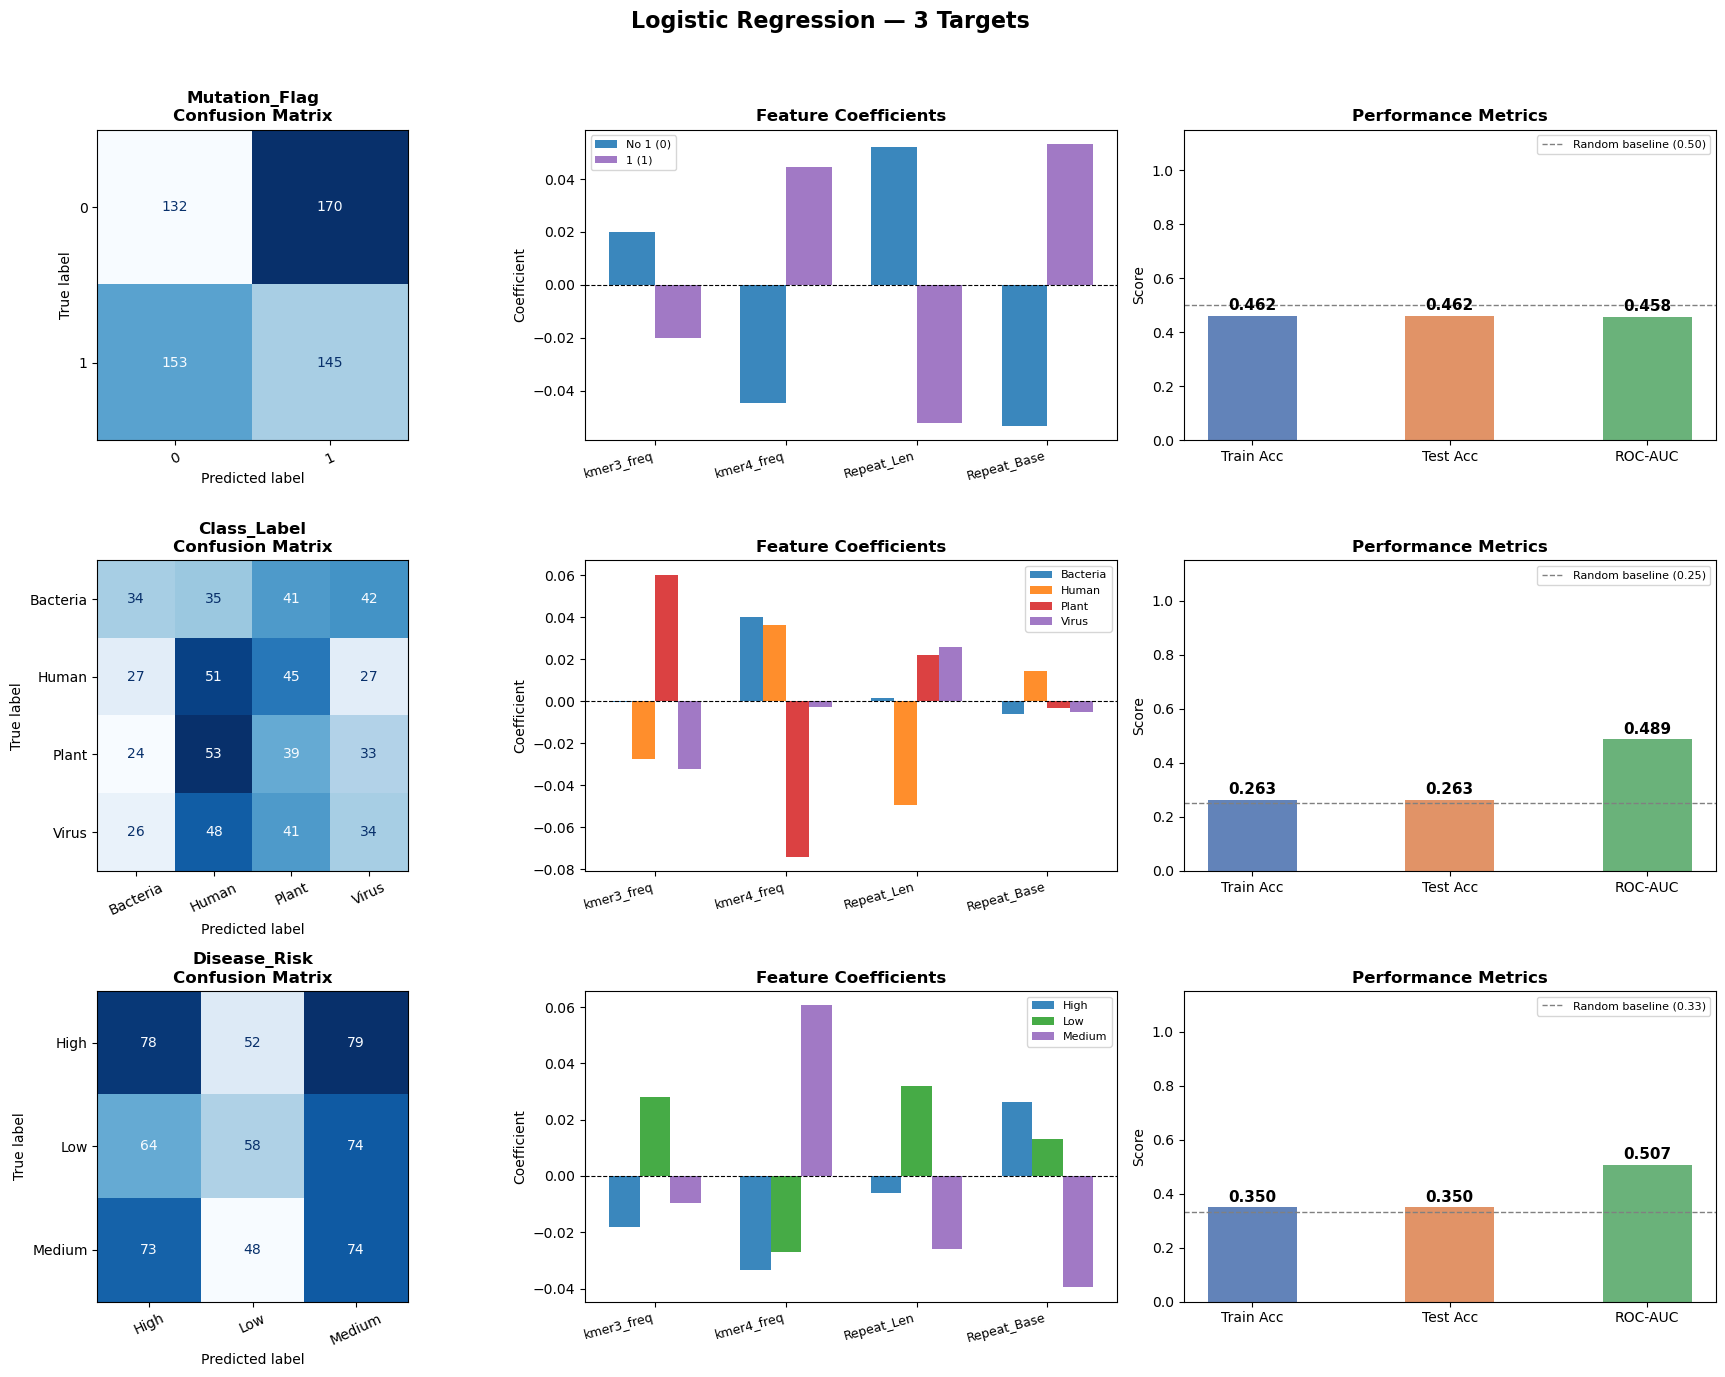

In [52]:
FEAT_LABELS = ["kmer3_freq", "kmer4_freq", "Repeat_Len", "Repeat_Base"]
BAR_COLORS  = ["#4C72B0", "#DD8452", "#55A868"]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle("Logistic Regression — 3 Targets", fontsize=16, fontweight="bold")

for row, (target, r) in enumerate(all_results.items()):

    model   = r["model"]
    classes = r["classes"]
    n_cls   = len(classes)
    y_test  = r["y_test"]
    y_pred  = r["y_pred"]

    # ── Col 0: Confusion Matrix ───────────────────────────────
    ax = axes[row][0]
    ConfusionMatrixDisplay(
        confusion_matrix(y_test, y_pred), display_labels=classes
    ).plot(ax=ax, colorbar=False, cmap="Blues")
    ax.set_title(f"{target}\nConfusion Matrix", fontweight="bold")
    ax.tick_params(axis="x", rotation=25)

    # ── Col 1: Feature Coefficients ──────────────────────────
    ax   = axes[row][1]
    coef = model.coef_               # (1, n_feat) for binary, (n_cls, n_feat) for multi

    # For binary logistic regression coef_ has shape (1, n_features).
    # Duplicate it so we can show both "class 0" and "class 1" symmetrically.
    if n_cls == 2:
        coef_plot  = np.vstack([-coef[0], coef[0]])
        plot_cls   = [f"No {classes[1]} (0)", f"{classes[1]} (1)"]
    else:
        coef_plot = coef
        plot_cls  = classes

    x     = np.arange(len(FEAT_LABELS))
    bar_w = 0.7 / len(plot_cls)
    pal   = plt.cm.tab10(np.linspace(0, 0.45, len(plot_cls)))

    for i, cls in enumerate(plot_cls):
        ax.bar(x + i * bar_w, coef_plot[i], bar_w,
               label=str(cls), color=pal[i], alpha=0.88)

    ax.set_xticks(x + bar_w * (len(plot_cls) - 1) / 2)
    ax.set_xticklabels(FEAT_LABELS, rotation=15, ha="right", fontsize=9)
    ax.axhline(0, color="black", linewidth=0.8, linestyle="--")
    ax.set_ylabel("Coefficient")
    ax.set_title("Feature Coefficients", fontweight="bold")
    ax.legend(fontsize=8)

    # ── Col 2: Performance Metrics ────────────────────────────
    ax      = axes[row][2]
    metrics = ["Train Acc", "Test Acc", "ROC-AUC"]
    values  = [r["train_acc"], r["test_acc"], r["auc"]]
    bars    = ax.bar(metrics, values, color=BAR_COLORS, alpha=0.88, width=0.45)

    ax.set_ylim(0, 1.15)
    baseline = 1 / n_cls
    ax.axhline(baseline, color="gray", linestyle="--", linewidth=1,
               label=f"Random baseline ({baseline:.2f})")
    ax.set_ylabel("Score")
    ax.set_title("Performance Metrics", fontweight="bold")
    ax.legend(fontsize=8)

    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, val + 0.02,
                f"{val:.3f}", ha="center", fontsize=11, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("logistic_regression_3targets_results.png", dpi=150, bbox_inches="tight")
plt.show()


RANDOM FOREST RESULTS

Target: Disease_Risk
Classes: ['High', 'Low', 'Medium']
------------------------------
Accuracy: 0.3378
Precision: 0.3377
Recall: 0.3378
F1-Score: 0.3376
ROC-AUC: 0.4953
Random forest Confusion matrix for Disease_Risk
Random Forest for Disease_Risk



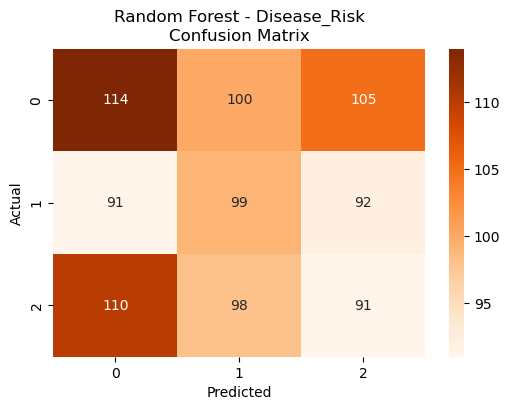

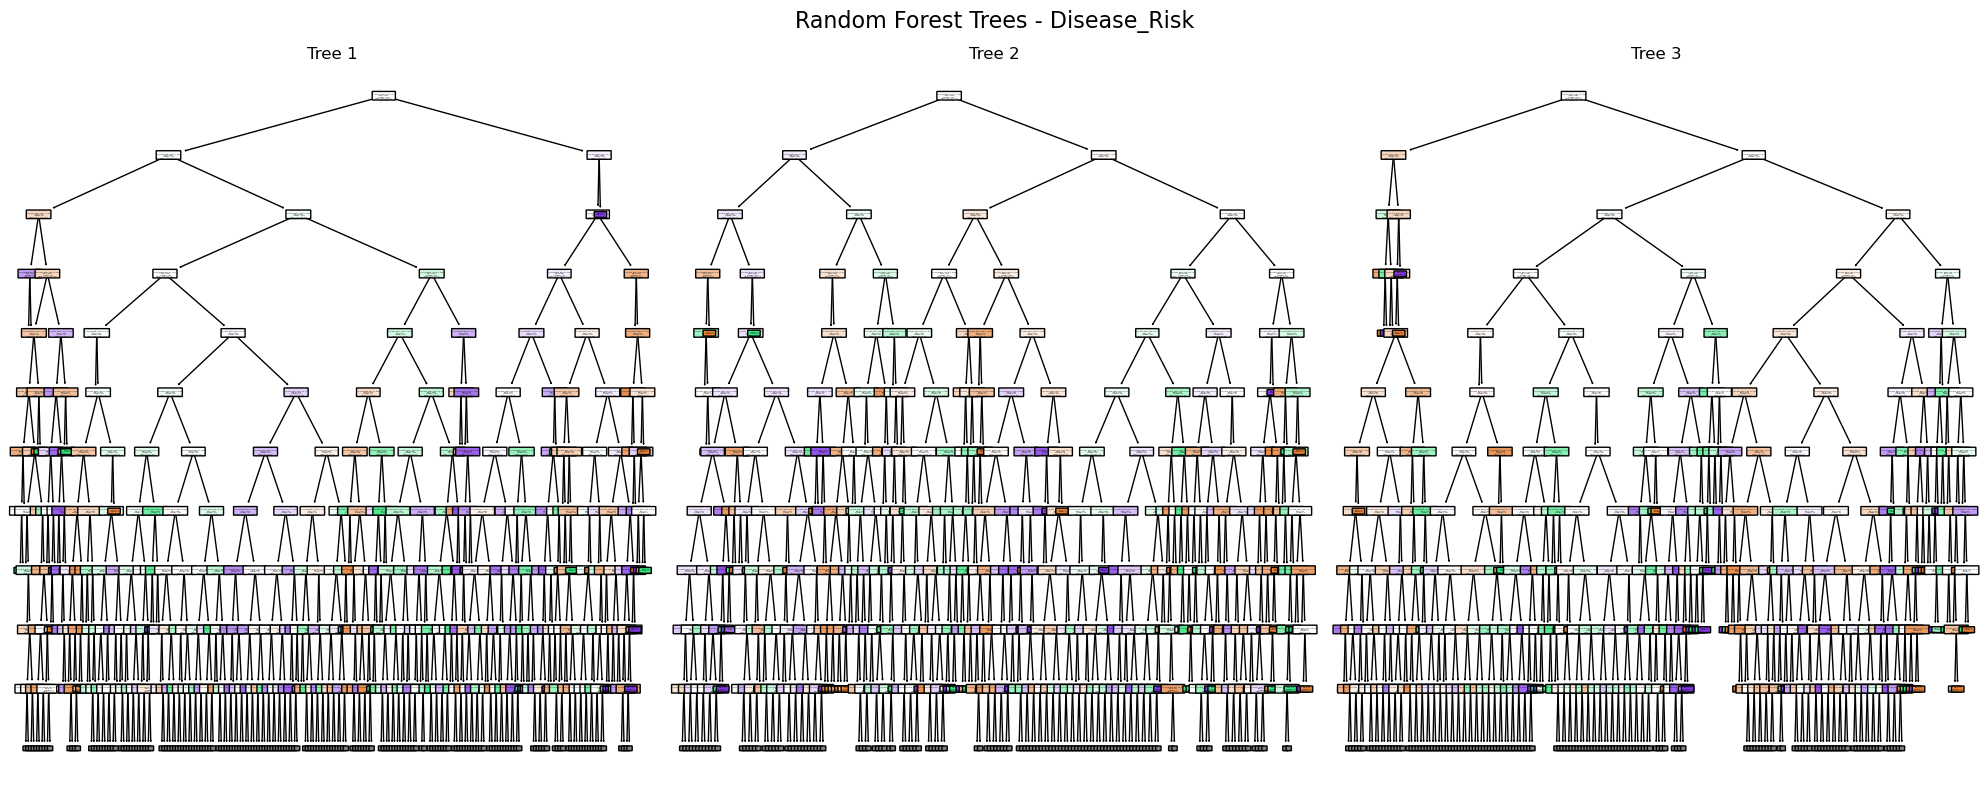

Target: Mutation_Flag
Classes: ['0', '1']
------------------------------
Accuracy: 0.4989
Precision: 0.5019
Recall: 0.4989
F1-Score: 0.4985
ROC-AUC: 0.4872
Random forest Confusion matrix for Mutation_Flag
Random Forest for Mutation_Flag



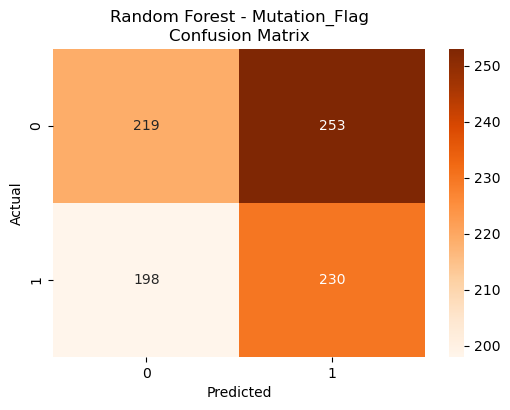

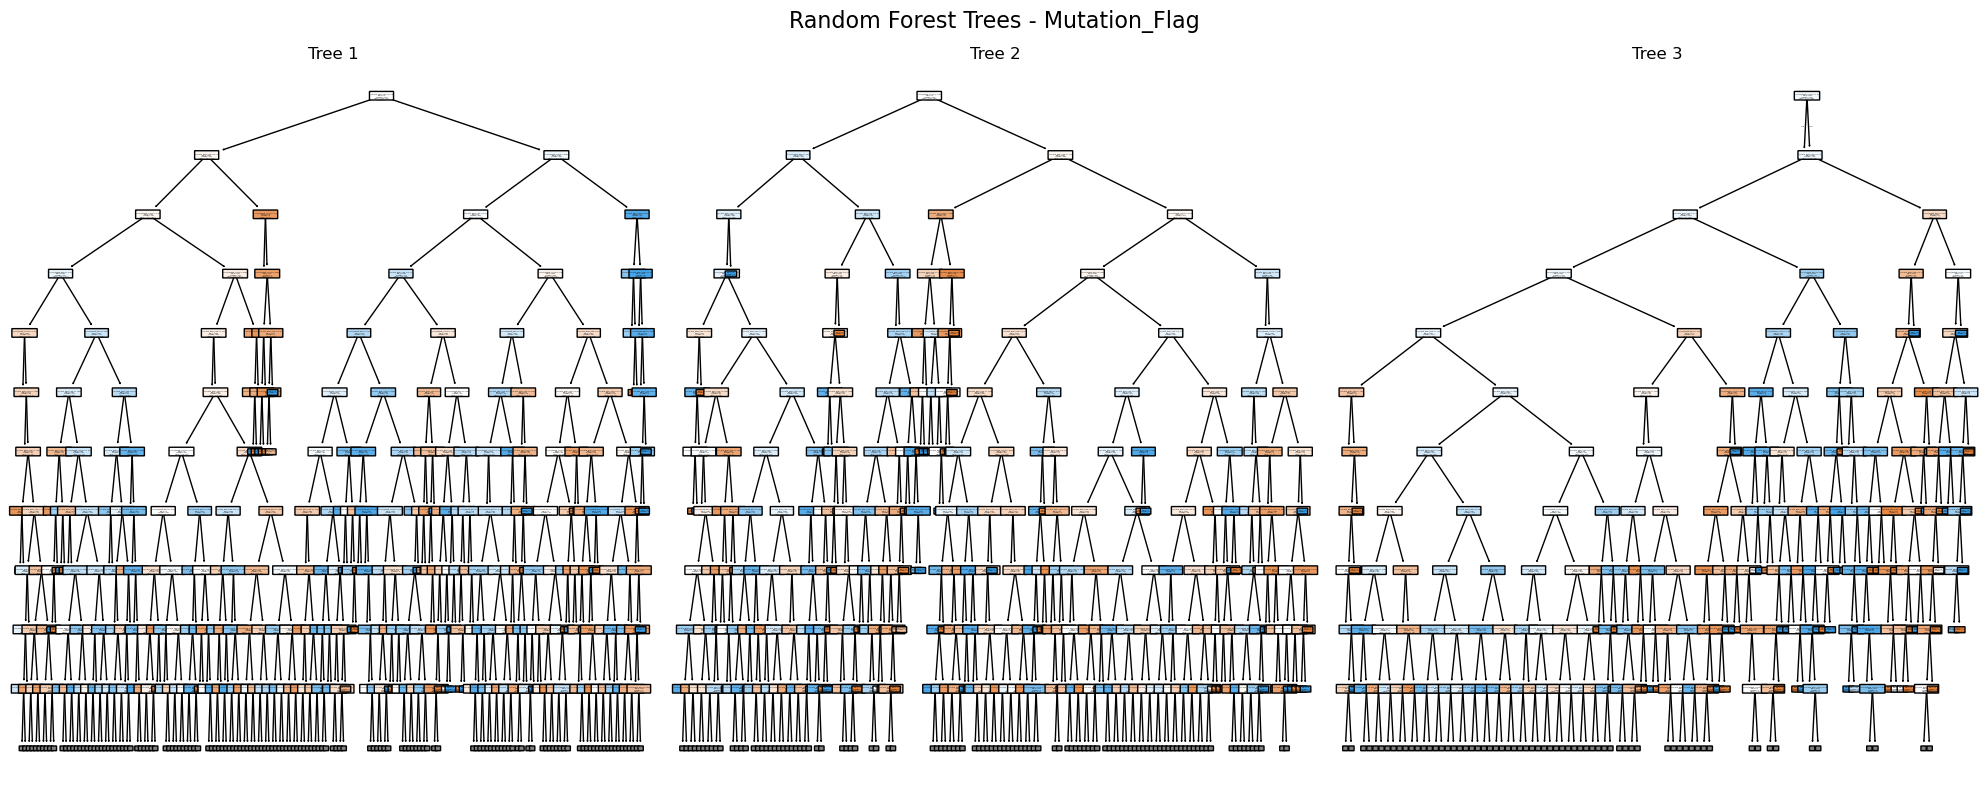

Target: Class_Label
Classes: ['Bacteria', 'Human', 'Plant', 'Virus']
------------------------------
Accuracy: 0.2433
Precision: 0.2458
Recall: 0.2433
F1-Score: 0.2442
ROC-AUC: 0.4965
Random forest Confusion matrix for Class_Label
Random Forest for Class_Label



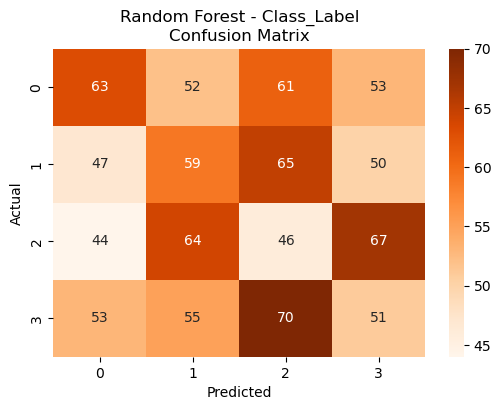

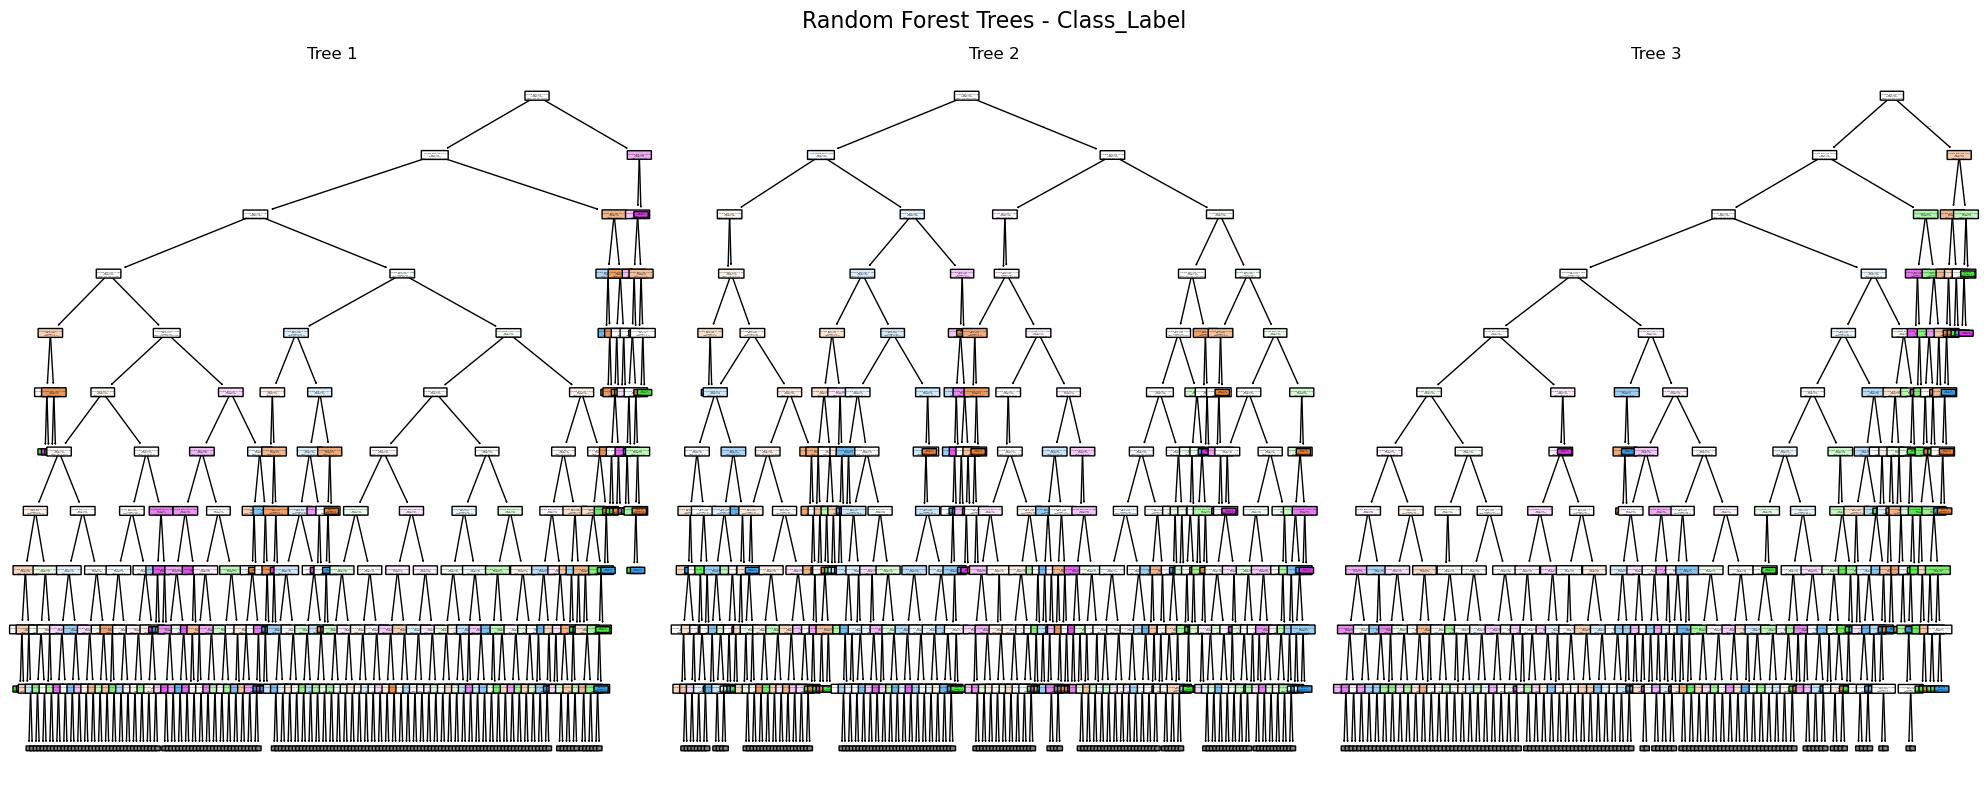

ALL MODELS COMPLETED!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)
from sklearn.tree import plot_tree

# ==================================================
# Load dataset
# ==================================================
df_header = pd.read_csv("synthetic_dna_dataset.csv", skiprows=1, header=None, nrows=2)
actual_columns = df_header.iloc[0].tolist()
df = pd.read_csv("synthetic_dna_dataset.csv", skiprows=[0, 1], header=None, names=actual_columns)

# Drop non-predictive columns
df = df.drop(columns=["Sample_ID", "Sequence"], errors="ignore")

# ==================================================
# Use ENGINEERED features
# ==================================================
feature_cols = [
    "calculated_kmer3_freq",
    "calculated_kmer4_freq",
    "Longest_Repeat_Length",
    "Longest_Repeat_Base"
]

def preprocess_features(df, feature_cols):
    X = df[feature_cols].copy()
    le_base = LabelEncoder()
    X["Longest_Repeat_Base"] = le_base.fit_transform(X["Longest_Repeat_Base"])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, list(X.columns)

def train_evaluate_rf(df, target_col, feature_cols):
    X_scaled, feature_names = preprocess_features(df, feature_cols)
    
    y_raw = df[target_col].astype(str).copy()
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    class_names = list(le.classes_)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    y_prob = rf_model.predict_proba(X_test)

    # ===============================
    # Metrics
    # ===============================
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    if len(class_names) == 2:
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

    conf_matrix = confusion_matrix(y_test, y_pred)

    # ===============================
    # PRINT FORMAT
    # ===============================
    print(f"Target: {target_col}")
    print(f"Classes: {class_names}")
    print("------------------------------")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Random forest Confusion matrix for {target_col}")
    print(f"Random Forest for {target_col}")
    print()

    # ===============================
    # Confusion Matrix Display
    # ===============================
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
    plt.title(f"Random Forest - {target_col}\nConfusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ===============================
    # Display 3 Trees from Forest
    # ===============================
    plt.figure(figsize=(20, 8))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plot_tree(
            rf_model.estimators_[i],
            feature_names=feature_names,
            class_names=class_names,
            filled=True,
            rounded=True,
            max_depth=10   # keeps visualization readable
        )
        plt.title(f"Tree {i+1}")

    plt.suptitle(f"Random Forest Trees - {target_col}", fontsize=16)
    plt.tight_layout()
    plt.show()

    return rf_model, le


# ==================================================
# Train ALL 3 models
# ==================================================
print("=" * 50)
print("RANDOM FOREST RESULTS")
print("=" * 50)
print()

rf_disease, le_disease = train_evaluate_rf(df, "Disease_Risk", feature_cols)
rf_mutation, le_mutation = train_evaluate_rf(df, "Mutation_Flag", feature_cols)
rf_class, le_class = train_evaluate_rf(df, "Class_Label", feature_cols)

print("=" * 50)
print("ALL MODELS COMPLETED!")
print("=" * 50)